In [2]:
import tensorflow as tf
w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[2.0],[1.0]])
y=tf.matmul(w,x)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(y))

[[ 2.]]


In [5]:
c=tf.constant([[1,2],[4,3],[5,6]])
shuff=tf.random_shuffle(c)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(shuff))

[[4 3]
 [1 2]
 [5 6]]


In [6]:
state=tf.Variable(0)
new_value=tf.add(state,tf.constant(1))
update=tf.assign(state,new_value)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(state)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

<tf.Variable 'Variable_2:0' shape=() dtype=int32_ref>
1
2
3


In [14]:
from tensorflow.python.framework import graph_util
w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[2.0],[1.0]])
y=tf.matmul(w,x,name='mat')
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    graph_def=tf.get_default_graph().as_graph_def()
    
    output_graph_def=graph_util.convert_variables_to_constants(sess,graph_def,['mat'])
    with tf.gfile.GFile("F:\\hua\\model.pb","wb") as f:
        f.write(output_graph_def.SerializeToString())

INFO:tensorflow:Froze 2 variables.
Converted 2 variables to const ops.


In [16]:
import tensorflow as tf
from tensorflow.python.platform import gfile
with tf.Session() as sess:
    model="F:\\hua\\model.pb"
    with gfile.FastGFile(model,'rb') as f:
        graph_def=tf.GraphDef()
        graph_def.ParseFromString(f.read())
        result=tf.import_graph_def(graph_def,return_elements=["mat:0"])
        print(sess.run(result))

[array([[ 2.]], dtype=float32)]


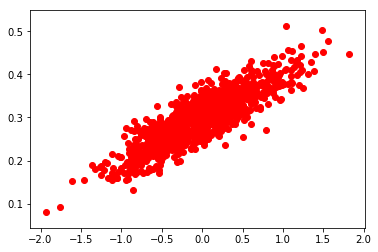

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
num_points=1000
vactors=[]
for i in range(num_points):
    x1=np.random.normal(0.0,0.55)
    y1=x1*0.1+0.3+np.random.normal(0.0,0.03)
    vactors.append([x1,y1])
x_data=[v[0] for v in vactors]
y_data=[v[1] for v in vactors]
plt.scatter(x_data,y_data,c='r')
plt.show()

W: [-0.90086567] b= [ 0.67071158] loss 0.451879
W: [-0.13073058] b= [ 0.29536813] loss 0.0168734
W: [ 0.08145402] b= [ 0.30000192] loss 0.00102447
W: [ 0.09838986] b= [ 0.30025199] loss 0.000932651
W: [ 0.09864385] b= [ 0.30025601] loss 0.000932631
W: [ 0.09864285] b= [ 0.30025601] loss 0.000932631
W: [ 0.09864285] b= [ 0.30025601] loss 0.000932631
W: [ 0.09864285] b= [ 0.30025601] loss 0.000932631
W: [ 0.09864285] b= [ 0.30025601] loss 0.000932631
W: [ 0.09864285] b= [ 0.30025601] loss 0.000932631


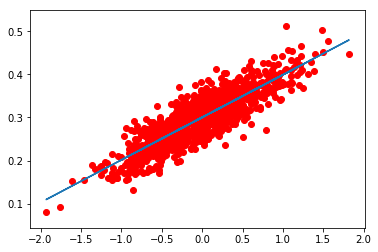

In [22]:
W=tf.Variable(tf.random_normal([1]),name='w')
b=tf.Variable(tf.random_normal([1]),name='b')
y_=tf.add(tf.multiply(W,x_data),b)
loss=tf.reduce_mean(tf.square(y_-y_data),name='loss')
optimizer=tf.train.AdamOptimizer(0.01).minimize(loss)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(1000):
        _,losses=sess.run([optimizer,loss])
        if(i%100==0):
            print("W:",sess.run(W),"b=",sess.run(b),"loss",losses)
    plt.scatter(x_data,y_data,c='r')
    plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
    plt.show()

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('/tmp/data/',one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [30]:
x=tf.placeholder(tf.float32,shape=[None,784],name='x_input')
y=tf.placeholder(tf.float32,shape=[None,10],name='y_input')

W=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([10]))

y_=tf.add(tf.matmul(x,W),b)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_,labels=y))
optm=tf.train.AdamOptimizer(0.005).minimize(cost)
batch_size=128
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    avg_loss=0
    for epoch in range(40):
        num=int(mnist.train.num_examples/batch_size)
        for i in range(num):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,l=sess.run([optm,cost],feed_dict={x:batch_xs,y:batch_ys})
            avg_loss+=l/num
        corr=tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
        accr=tf.reduce_mean(tf.cast(corr,tf.float32))
        print("Epoch:",epoch,"loss",avg_loss,"测试集准确率：",accr.eval({x:mnist.test.images,y:mnist.test.labels}))

Epoch: 0 loss 2.26161076834 测试集准确率： 0.8261
Epoch: 1 loss 2.95235261811 测试集准确率： 0.8738
Epoch: 2 loss 3.46999165325 测试集准确率： 0.8912
Epoch: 3 loss 3.92183460351 测试集准确率： 0.8999
Epoch: 4 loss 4.32274029255 测试集准确率： 0.9045
Epoch: 5 loss 4.7049044342 测试集准确率： 0.9071
Epoch: 6 loss 5.0628992119 测试集准确率： 0.9105
Epoch: 7 loss 5.39611517018 测试集准确率： 0.9119
Epoch: 8 loss 5.72567516637 测试集准确率： 0.9149
Epoch: 9 loss 6.04047456368 测试集准确率： 0.9145
Epoch: 10 loss 6.34548070718 测试集准确率： 0.9146
Epoch: 11 loss 6.64600131204 测试集准确率： 0.916
Epoch: 12 loss 6.93759111846 测试集准确率： 0.9185
Epoch: 13 loss 7.2295423637 测试集准确率： 0.9183
Epoch: 14 loss 7.50747814069 测试集准确率： 0.9175
Epoch: 15 loss 7.78442193981 测试集准确率： 0.9221
Epoch: 16 loss 8.05882407954 测试集准确率： 0.9203
Epoch: 17 loss 8.32789450024 测试集准确率： 0.9157
Epoch: 18 loss 8.59816421832 测试集准确率： 0.9173
Epoch: 19 loss 8.86273177538 测试集准确率： 0.919
Epoch: 20 loss 9.12583594938 测试集准确率： 0.9197
Epoch: 21 loss 9.38884005835 测试集准确率： 0.9217
Epoch: 22 loss 9.6428733194 测试集准确率： 0.919
Epoch

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('/tmp/data/',one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [44]:
x=tf.placeholder(tf.float32,shape=[None,784],name='x_input')
y=tf.placeholder(tf.float32,shape=[None,10],name='y_input')

W1=tf.Variable(tf.random_normal([784,256]),name='W')
b1=tf.Variable(tf.random_normal([256]),name='b1')

W2=tf.Variable(tf.random_normal([256,256]),name='w2')
b2=tf.Variable(tf.random_normal([256]),name='b2')

W3=tf.Variable(tf.random_normal([256,10]),name='W3')
b3=tf.Variable(tf.random_normal([10]),name='b3')

layer_1=tf.nn.relu(tf.add(tf.matmul(x,W1),b1))
layer_2=tf.nn.relu(tf.add(tf.matmul(layer_1,W2),b2))
pred=tf.add(tf.matmul(layer_2,W3),b3)

cost=tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)
loss=tf.reduce_mean(cost)
optm=tf.train.AdamOptimizer(0.01).minimize(loss)

In [45]:
batch_size=128
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(20):
        avg_loss=0
        num=int(mnist.train.num_examples/batch_size)
        for i in range(num):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,l=sess.run([optm,loss],feed_dict={x:batch_xs,y:batch_ys})
            avg_loss+=l/num
        
        corr1=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
        accr1=tf.reduce_mean(tf.cast(corr1,tf.float32))
        
        corr2=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
        accr2=tf.reduce_mean(tf.cast(corr2,tf.float32))
        print("Epoch:",epoch,"loss:",avg_loss,"训练集准确率：",accr1.eval({x:mnist.train.images,y:mnist.train.labels}),"测试集准确率：",accr2.eval({x:mnist.test.images,y:mnist.test.labels}))
        #print("训练集准确率：",accr1.eval({x:mnist.train.images,y:mnist.train.labels}))
        #print("测试集准确率：",accr2.eval({x:mnist.test.images,y:mnist.test.labels}))
        

Epoch: 0 loss: 58.7949041748 训练集准确率： 0.936182 测试集准确率： 0.9235
Epoch: 1 loss: 9.51446243419 训练集准确率： 0.952582 测试集准确率： 0.9311
Epoch: 2 loss: 5.09775144421 训练集准确率： 0.967927 测试集准确率： 0.945
Epoch: 3 loss: 3.20334699499 训练集准确率： 0.975509 测试集准确率： 0.95
Epoch: 4 loss: 2.41886403817 训练集准确率： 0.976727 测试集准确率： 0.954
Epoch: 5 loss: 2.01095213395 训练集准确率： 0.978109 测试集准确率： 0.9553
Epoch: 6 loss: 1.85156475725 训练集准确率： 0.981509 测试集准确率： 0.9563
Epoch: 7 loss: 1.72449184969 训练集准确率： 0.983091 测试集准确率： 0.9589
Epoch: 8 loss: 1.56985394695 训练集准确率： 0.984073 测试集准确率： 0.9573
Epoch: 9 loss: 1.50056226731 训练集准确率： 0.983127 测试集准确率： 0.9586
Epoch: 10 loss: 1.48412450784 训练集准确率： 0.985491 测试集准确率： 0.9602
Epoch: 11 loss: 1.47898495388 训练集准确率： 0.9842 测试集准确率： 0.9585
Epoch: 12 loss: 1.09006754341 训练集准确率： 0.983509 测试集准确率： 0.9593
Epoch: 13 loss: 1.08862391718 训练集准确率： 0.986364 测试集准确率： 0.9645
Epoch: 14 loss: 1.06555361677 训练集准确率： 0.986055 测试集准确率： 0.9647
Epoch: 15 loss: 1.01629848438 训练集准确率： 0.986582 测试集准确率： 0.9641
Epoch: 16 loss: 0.956979

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('/tmp/data/',one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
def conv_basic(x):
    x=tf.reshape(x,shape=[-1,28,28,1])  
    with tf.variable_scope('layer1-conv1'):
        conv_weights=tf.get_variable('weights',shape=[3,3,1,32],initializer=tf.truncated_normal_initializer(stddev=0.1))
        conv_biases=tf.get_variable('biases',shape=[32],initializer=tf.constant_initializer(0.0))
        conv1=tf.nn.conv2d(x,conv_weights,strides=[1,1,1,1],padding='SAME')
        relu1=tf.nn.relu(tf.nn.bias_add(conv1,conv_biases))
    with tf.variable_scope('layer2-pool1'):
        pool1=tf.nn.max_pool(relu1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    with tf.variable_scope('layer3-conv2'):
        conv_weights=tf.get_variable('weights',shape=[3,3,32,64],initializer=tf.truncated_normal_initializer(stddev=0.1))
        conv_biases=tf.get_variable('biases',shape=[64],initializer=tf.constant_initializer(0.0))
        conv2=tf.nn.conv2d(pool1,conv_weights,strides=[1,1,1,1],padding='SAME')
        relu2=tf.nn.relu(tf.nn.bias_add(conv2,conv_biases))
    with tf.variable_scope('layer4-pool2'):
        pool2=tf.nn.max_pool(relu2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    pool2=tf.reshape(pool2,[-1,7*7*64])
    with tf.variable_scope('layer5-fc1'):
        fc_weights=tf.get_variable('weights',shape=[7*7*64,50],initializer=tf.truncated_normal_initializer(stddev=0.1))
        fc_biases=tf.get_variable('biases',shape=[50],initializer=tf.constant_initializer(0.0))
        fc1=tf.add(tf.matmul(pool2,fc_weights),fc_biases)
        fc1=tf.nn.relu(fc1)
    fc1=tf.nn.dropout(fc1,0.8)
    with tf.variable_scope('layer6-fc2'):
        fc_weights=tf.get_variable('weights',shape=[50,10],initializer=tf.truncated_normal_initializer(stddev=0.1))
        fc_biases=tf.get_variable("biases",shape=[10],initializer=tf.constant_initializer(0.0))
        out=tf.add(tf.matmul(fc1,fc_weights),fc_biases)
    return out

In [3]:
X=tf.placeholder(tf.float32,shape=[None,784],name='x_input')
Y=tf.placeholder(tf.float32,shape=[None,10],name='y_input')

pred=conv_basic(X)

In [4]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=Y))
optm=tf.train.AdamOptimizer(0.001).minimize(cost)
batch_size=128

In [5]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(20):
        num=int(mnist.train.num_examples/batch_size)
        avg_loss=0
        for i in range(num):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,l=sess.run([optm,cost],feed_dict={X:batch_xs,Y:batch_ys})
            avg_loss+=l/num
        
        #corr1=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
        #arrc1=tf.reduce_mean(tf.ca st(corr1,tf.float32))
        
        corr2=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
        arrc2=tf.reduce_mean(tf.cast(corr2,tf.float32))
        print("Epoch:",epoch,"loss:",avg_loss,"测试集准确率：",arrc2.eval({X:mnist.test.images,Y:mnist.test.labels}))
       

Epoch: 0 loss: 0.333053181082 测试集准确率： 0.9666
Epoch: 1 loss: 0.0971803656304 测试集准确率： 0.9782
Epoch: 2 loss: 0.0707796175328 测试集准确率： 0.9813
Epoch: 3 loss: 0.0567178035596 测试集准确率： 0.9835
Epoch: 4 loss: 0.0490087186082 测试集准确率： 0.9858
Epoch: 5 loss: 0.0395221574735 测试集准确率： 0.9843
Epoch: 6 loss: 0.0365758888157 测试集准确率： 0.984
Epoch: 7 loss: 0.0331258574815 测试集准确率： 0.987
Epoch: 8 loss: 0.0285538912611 测试集准确率： 0.9885
Epoch: 9 loss: 0.0258788108228 测试集准确率： 0.9874
Epoch: 10 loss: 0.0230101658059 测试集准确率： 0.9879
Epoch: 11 loss: 0.0205222067054 测试集准确率： 0.9876
Epoch: 12 loss: 0.0170778031075 测试集准确率： 0.9878
Epoch: 13 loss: 0.0167899932866 测试集准确率： 0.9867
Epoch: 14 loss: 0.0166926257446 测试集准确率： 0.9848
Epoch: 15 loss: 0.0152652165311 测试集准确率： 0.9869
Epoch: 16 loss: 0.0141267939965 测试集准确率： 0.9866
Epoch: 17 loss: 0.0135176749346 测试集准确率： 0.9884
Epoch: 18 loss: 0.0115601562421 测试集准确率： 0.988
Epoch: 19 loss: 0.0106408008582 测试集准确率： 0.9867
